<a href="https://colab.research.google.com/github/Mhtag/time_series_tutorial/blob/main/Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install download

In [ ]:
 import seaborn as sns
 import matplotlib.pyplot as plt
 import pandas as pd
 import numpy as np
 from datetime import datetime
 from download import download
 import matplotlib as mpl

 mpl.rcParams['figure.figsize'] = (15,10)

In [ ]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

# moving average in Non Stationary data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv', parse_dates = ['Bill_Date'],date_parser=parse)
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


# Elecricity datset

In [ ]:

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  53
Columns  :  6

Features : 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing values :   Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

Unique values :  
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [ ]:
bill_df=df.set_index("Bill_Date")


In [ ]:
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


In [ ]:
## Simple moving average = (t + (t-1) + (t-2) + ... + (t-n)) / n)

In [ ]:
bill_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [ ]:
bill_2018['ma_rolling_3'] = bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


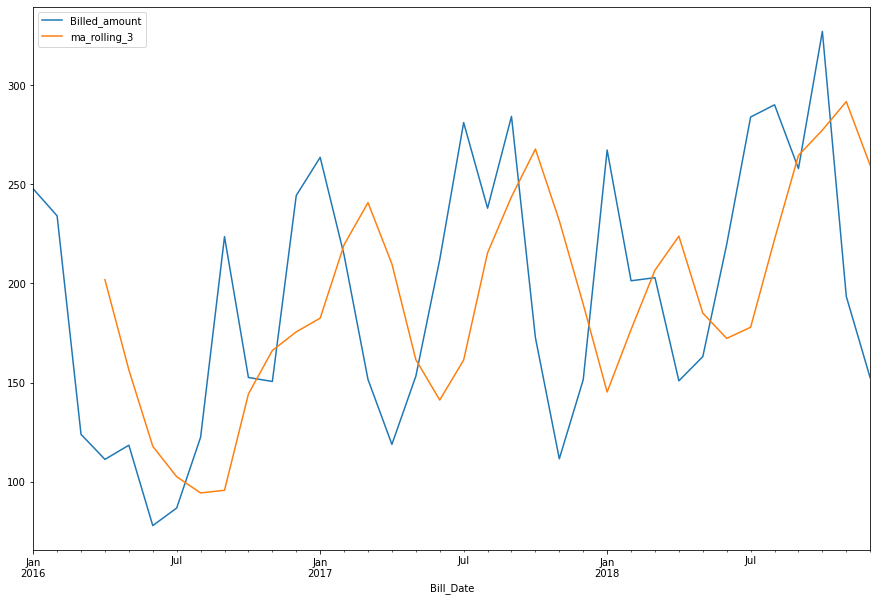

In [ ]:
bill_2018.plot()

## Weighted moving Average

weighted moving average = (t weighting factor) + ((t-1) weighting factor-1) + ((t-n) * weighting factor-n)/n

* weihted moving avrage is more sensitive to the data points.
* identify trends sooner.

In [ ]:
def wma(weights):
  def calc(x):
    return (weights*x).mean()
  return calc

In [ ]:
bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,0.75,1])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    141.099167
2016-04-01    107.054167
2016-05-01     87.903333
2016-06-01     74.065833
2016-07-01     68.070833
2016-08-01     75.435833
2016-09-01    119.585000
2016-10-01    127.151667
2016-11-01    125.585000
2016-12-01    144.515000
2017-01-01    174.062500
2017-02-01    178.078333
2017-03-01    148.033333
2017-04-01    113.201667
2017-05-01    106.014167
2017-06-01    128.786667
2017-07-01    172.280000
2017-08-01    184.967500
2017-09-01    201.124167
2017-10-01    168.300000
2017-11-01    127.725833
2017-12-01    107.132500
2018-01-01    145.546667
2018-02-01    159.183333
2018-03-01    162.527500
2018-04-01    134.572500
2018-05-01    125.890000
2018-06-01    139.164167
2018-07-01    176.778333
2018-08-01    204.338333
2018-09-01    205.854167
2018-10-01    221.911667
2018-11-01    189.287500
2018-12-01    153.684167
Name: Billed_amount, dtype: float64

In [ ]:
bill_2018['wma_rolling_3'] = bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.75,1,1.25]))).shift(1)
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,191.573333
2016-05-01,118.37,156.393333,146.152500
2016-06-01,77.81,117.813333,117.356667
2016-07-01,86.67,102.466667,99.682500
2016-08-01,122.40,94.283333,91.641667
2016-09-01,223.62,95.626667,99.342500


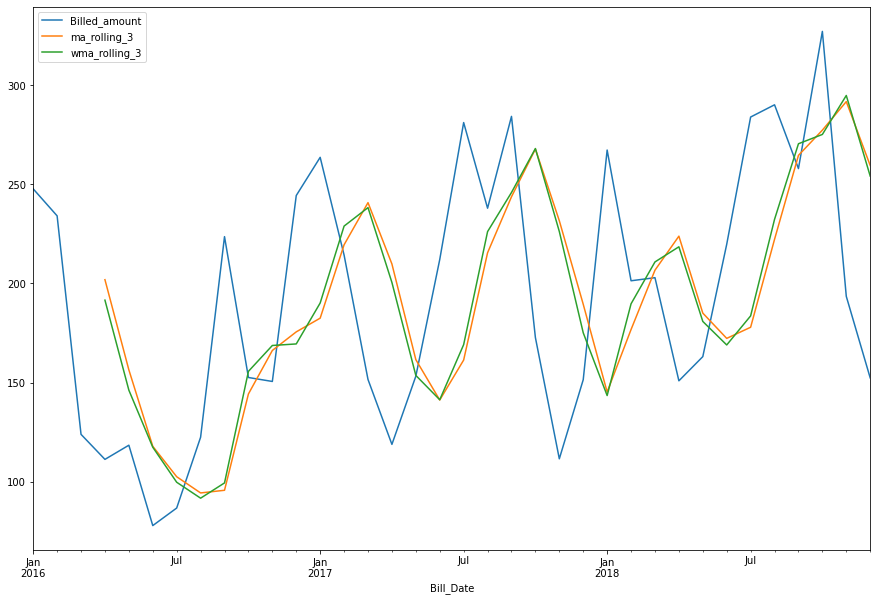

In [ ]:
bill_2018.plot()

# Exponential Moving Average

Exponential moving average = (Close - previous EMA) * (2/(span+1)) + previous EMA

In [ ]:
bill_2018['ema_window_3'] = bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ema_window_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,191.573333,182.385000
2016-05-01,118.37,156.393333,146.152500,146.802500
2016-06-01,77.81,117.813333,117.356667,132.586250
2016-07-01,86.67,102.466667,99.682500,105.198125
2016-08-01,122.40,94.283333,91.641667,95.934063
2016-09-01,223.62,95.626667,99.342500,109.167031


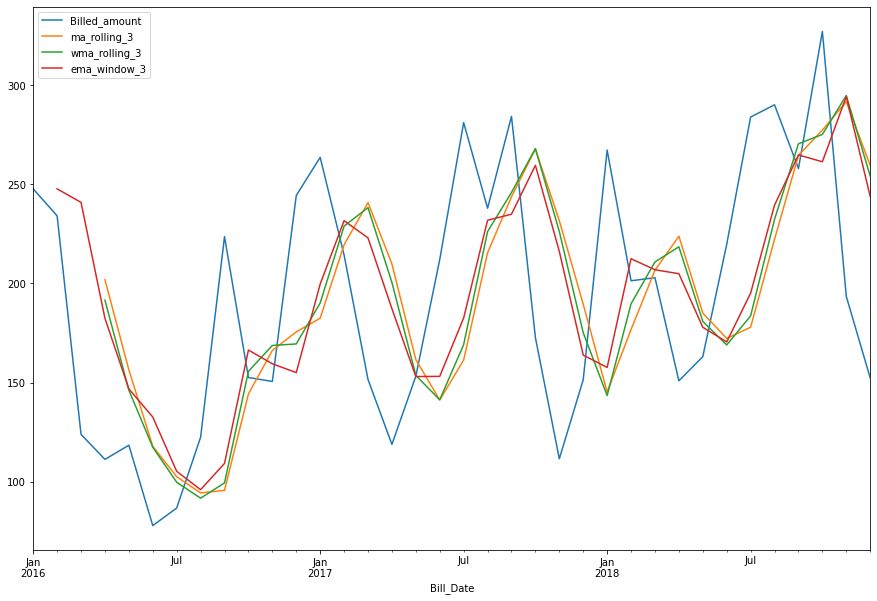

In [ ]:
bill_2018.plot()

# Exponential Smoothing

* alpha value is between 0 to 1.
* the larger value of alpha mean these is taking into the account the most recent data points.
* the smaller value of alpha means we are giving more weightage to older data points

##1. For alpha = 0.7

In [ ]:
bill_2018['esm_win_3_alpha_7'] = bill_2018['Billed_amount'].ewm(alpha=.7, adjust=False,min_periods=3).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ema_window_3,esm_win_3_alpha_7
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN
2016-04-01,111.22,201.896667,191.573333,182.385000,158.153800
2016-05-01,118.37,156.393333,146.152500,146.802500,125.300140
2016-06-01,77.81,117.813333,117.356667,132.586250,120.449042
2016-07-01,86.67,102.466667,99.682500,105.198125,90.601713
2016-08-01,122.40,94.283333,91.641667,95.934063,87.849514
2016-09-01,223.62,95.626667,99.342500,109.167031,112.034854


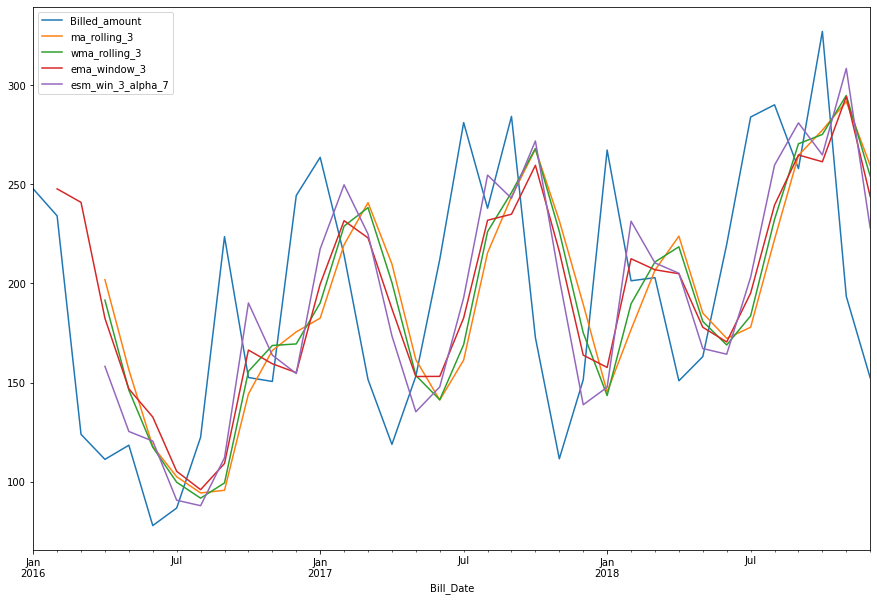

In [ ]:
bill_2018.plot()

##2. for alpha = 0.3

In [ ]:
bill_2018['esm_win_3_alpha_3'] = bill_2018['Billed_amount'].ewm(alpha=.3, adjust=False,min_periods=3).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ema_window_3,esm_win_3_alpha_7,esm_win_3_alpha_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN,NaN
2016-04-01,111.22,201.896667,191.573333,182.385000,158.153800,207.705800
2016-05-01,118.37,156.393333,146.152500,146.802500,125.300140,178.760060
2016-06-01,77.81,117.813333,117.356667,132.586250,120.449042,160.643042
2016-07-01,86.67,102.466667,99.682500,105.198125,90.601713,135.793129
2016-08-01,122.40,94.283333,91.641667,95.934063,87.849514,121.056191
2016-09-01,223.62,95.626667,99.342500,109.167031,112.034854,121.459333


## Lets compare the plots of exponential smothing with alpha 0.7 and alpha 0.3

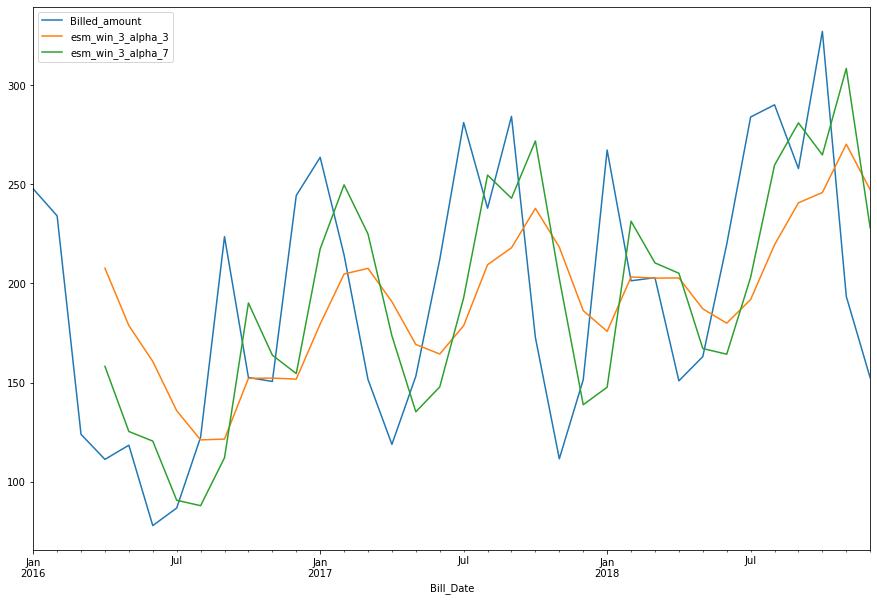

In [ ]:
bill_2018[['Billed_amount','esm_win_3_alpha_3','esm_win_3_alpha_7']].plot()

In [ ]:
bill_2018.columns

Index(['Billed_amount', 'ma_rolling_3', 'wma_rolling_3', 'ema_window_3',
       'esm_win_3_alpha_7', 'esm_win_3_alpha_3'],
      dtype='object')

# **RMSE**

## For moving average 3

In [ ]:
((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

70.98561687433802

## For weigted moving average

In [ ]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

68.10088924215594

## For exponential moving average

In [ ]:
((bill_2018['Billed_amount']-bill_2018['ema_window_3'])**2).mean()**0.5

64.32131239414655

## For Exponental Smoothing moving Average with alpha 0.7

In [ ]:
((bill_2018['Billed_amount']-bill_2018['esm_win_3_alpha_7'])**2).mean()**0.5

61.26408398853503

## For Exponental Smoothing moving Average with alpha 0.3

In [ ]:
((bill_2018['Billed_amount']-bill_2018['esm_win_3_alpha_3'])**2).mean()**0.5

65.22424423118377